In [1]:
import pandas as pd
df = pd.read_csv('cleaned_cars_data.csv')
df.head()

,City,Body_Type,Ownerno,Company,Model,Modelyear,Centralvariantid,Variantname,Price,Registration_Year,...,Height_Adjustable_Driver_Seat,Fog_Lights_Rear,Leather_Seats,Apple_Car_Play,Roof_Carrier,Speed_Alert,Outside_Rear_View_Mirror_Turn_Indicators,Wifi_Connectivity,Registration_Month,Age_Old_In_Year
0,chennai,SUV,1,Kia,Sonet,2022,8654,Turbo DCT,1150000,2022,...,True,False,True,True,False,False,True,False,6,2
1,chennai,Minivans,1,Maruti,Eeco,2015,4025,7 Seater,415000,2015,...,False,False,False,False,False,False,False,False,2,9
2,chennai,SUV,1,Nissan,Magnite,2021,8135,Turbo XV,750000,2021,...,True,False,False,True,False,False,True,True,6,3
3,chennai,Hatchback,1,Hyundai,i10,2015,1579,Sportz,398000,2015,...,False,False,False,False,False,False,False,False,5,9
4,chennai,Hatchback,1,Honda,Jazz,2015,1341,1.2 VX,550000,2015,...,True,False,False,False,False,False,True,False,8,9


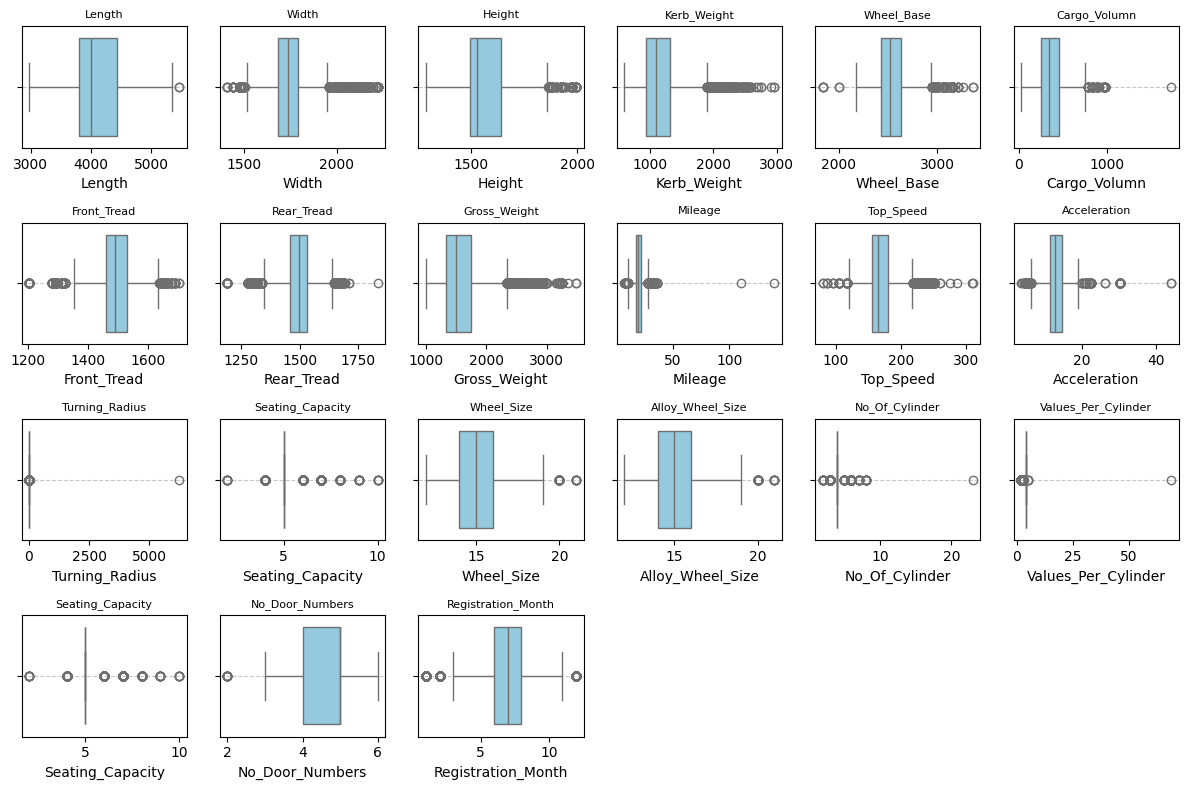

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_columns = ['Length', 'Width', 'Height', 'Kerb_Weight', 'Wheel_Base', 'Cargo_Volumn', 'Front_Tread', 'Rear_Tread', 'Gross_Weight',
                   'Mileage','Top_Speed','Acceleration', 'Turning_Radius', 'Seating_Capacity', 'Wheel_Size', 'Alloy_Wheel_Size',
                   'No_Of_Cylinder', 'Values_Per_Cylinder', 'Seating_Capacity', 'No_Door_Numbers', 'Registration_Month'
                   ]

n_cols = 6  # Number of columns in the grid
n_rows = -(-len(numeric_columns) // n_cols)  # Calculate rows dynamically

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 2 * n_rows))
axes = axes.flatten()  # Flatten axes array to handle dynamically

# Plot each column
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df, x=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{col}', fontsize=8)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remove extra subplots if numeric_columns < n_rows * n_cols
for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [3]:
# Removing less important features
features_to_remove = ['Turning_Radius', 'Gross_Weight', 'Length', 'Width', 'Height', 'Kerb_Weight', 'Wheel_Base', 'Cargo_Volumn', 
                      'Front_Tread', 'Rear_Tread', 'Gross_Weight', 'Wheel_Size', 'Alloy_Wheel_Size', 'No_Of_Cylinder', 'Values_Per_Cylinder', 
                      'Seating_Capacity', 'No_Door_Numbers', 'Registration_Month','Top_Speed','Acceleration']

df = df.drop(columns=features_to_remove)

In [4]:
df.head()

,City,Body_Type,Ownerno,Company,Model,Modelyear,Centralvariantid,Variantname,Price,Registration_Year,...,Dual_Tone_Dashboard,Height_Adjustable_Driver_Seat,Fog_Lights_Rear,Leather_Seats,Apple_Car_Play,Roof_Carrier,Speed_Alert,Outside_Rear_View_Mirror_Turn_Indicators,Wifi_Connectivity,Age_Old_In_Year
0,chennai,SUV,1,Kia,Sonet,2022,8654,Turbo DCT,1150000,2022,...,False,True,False,True,True,False,False,True,False,2
1,chennai,Minivans,1,Maruti,Eeco,2015,4025,7 Seater,415000,2015,...,False,False,False,False,False,False,False,False,False,9
2,chennai,SUV,1,Nissan,Magnite,2021,8135,Turbo XV,750000,2021,...,True,True,False,False,True,False,False,True,True,3
3,chennai,Hatchback,1,Hyundai,i10,2015,1579,Sportz,398000,2015,...,False,False,False,False,False,False,False,False,False,9
4,chennai,Hatchback,1,Honda,Jazz,2015,1341,1.2 VX,550000,2015,...,False,True,False,False,False,False,False,True,False,9


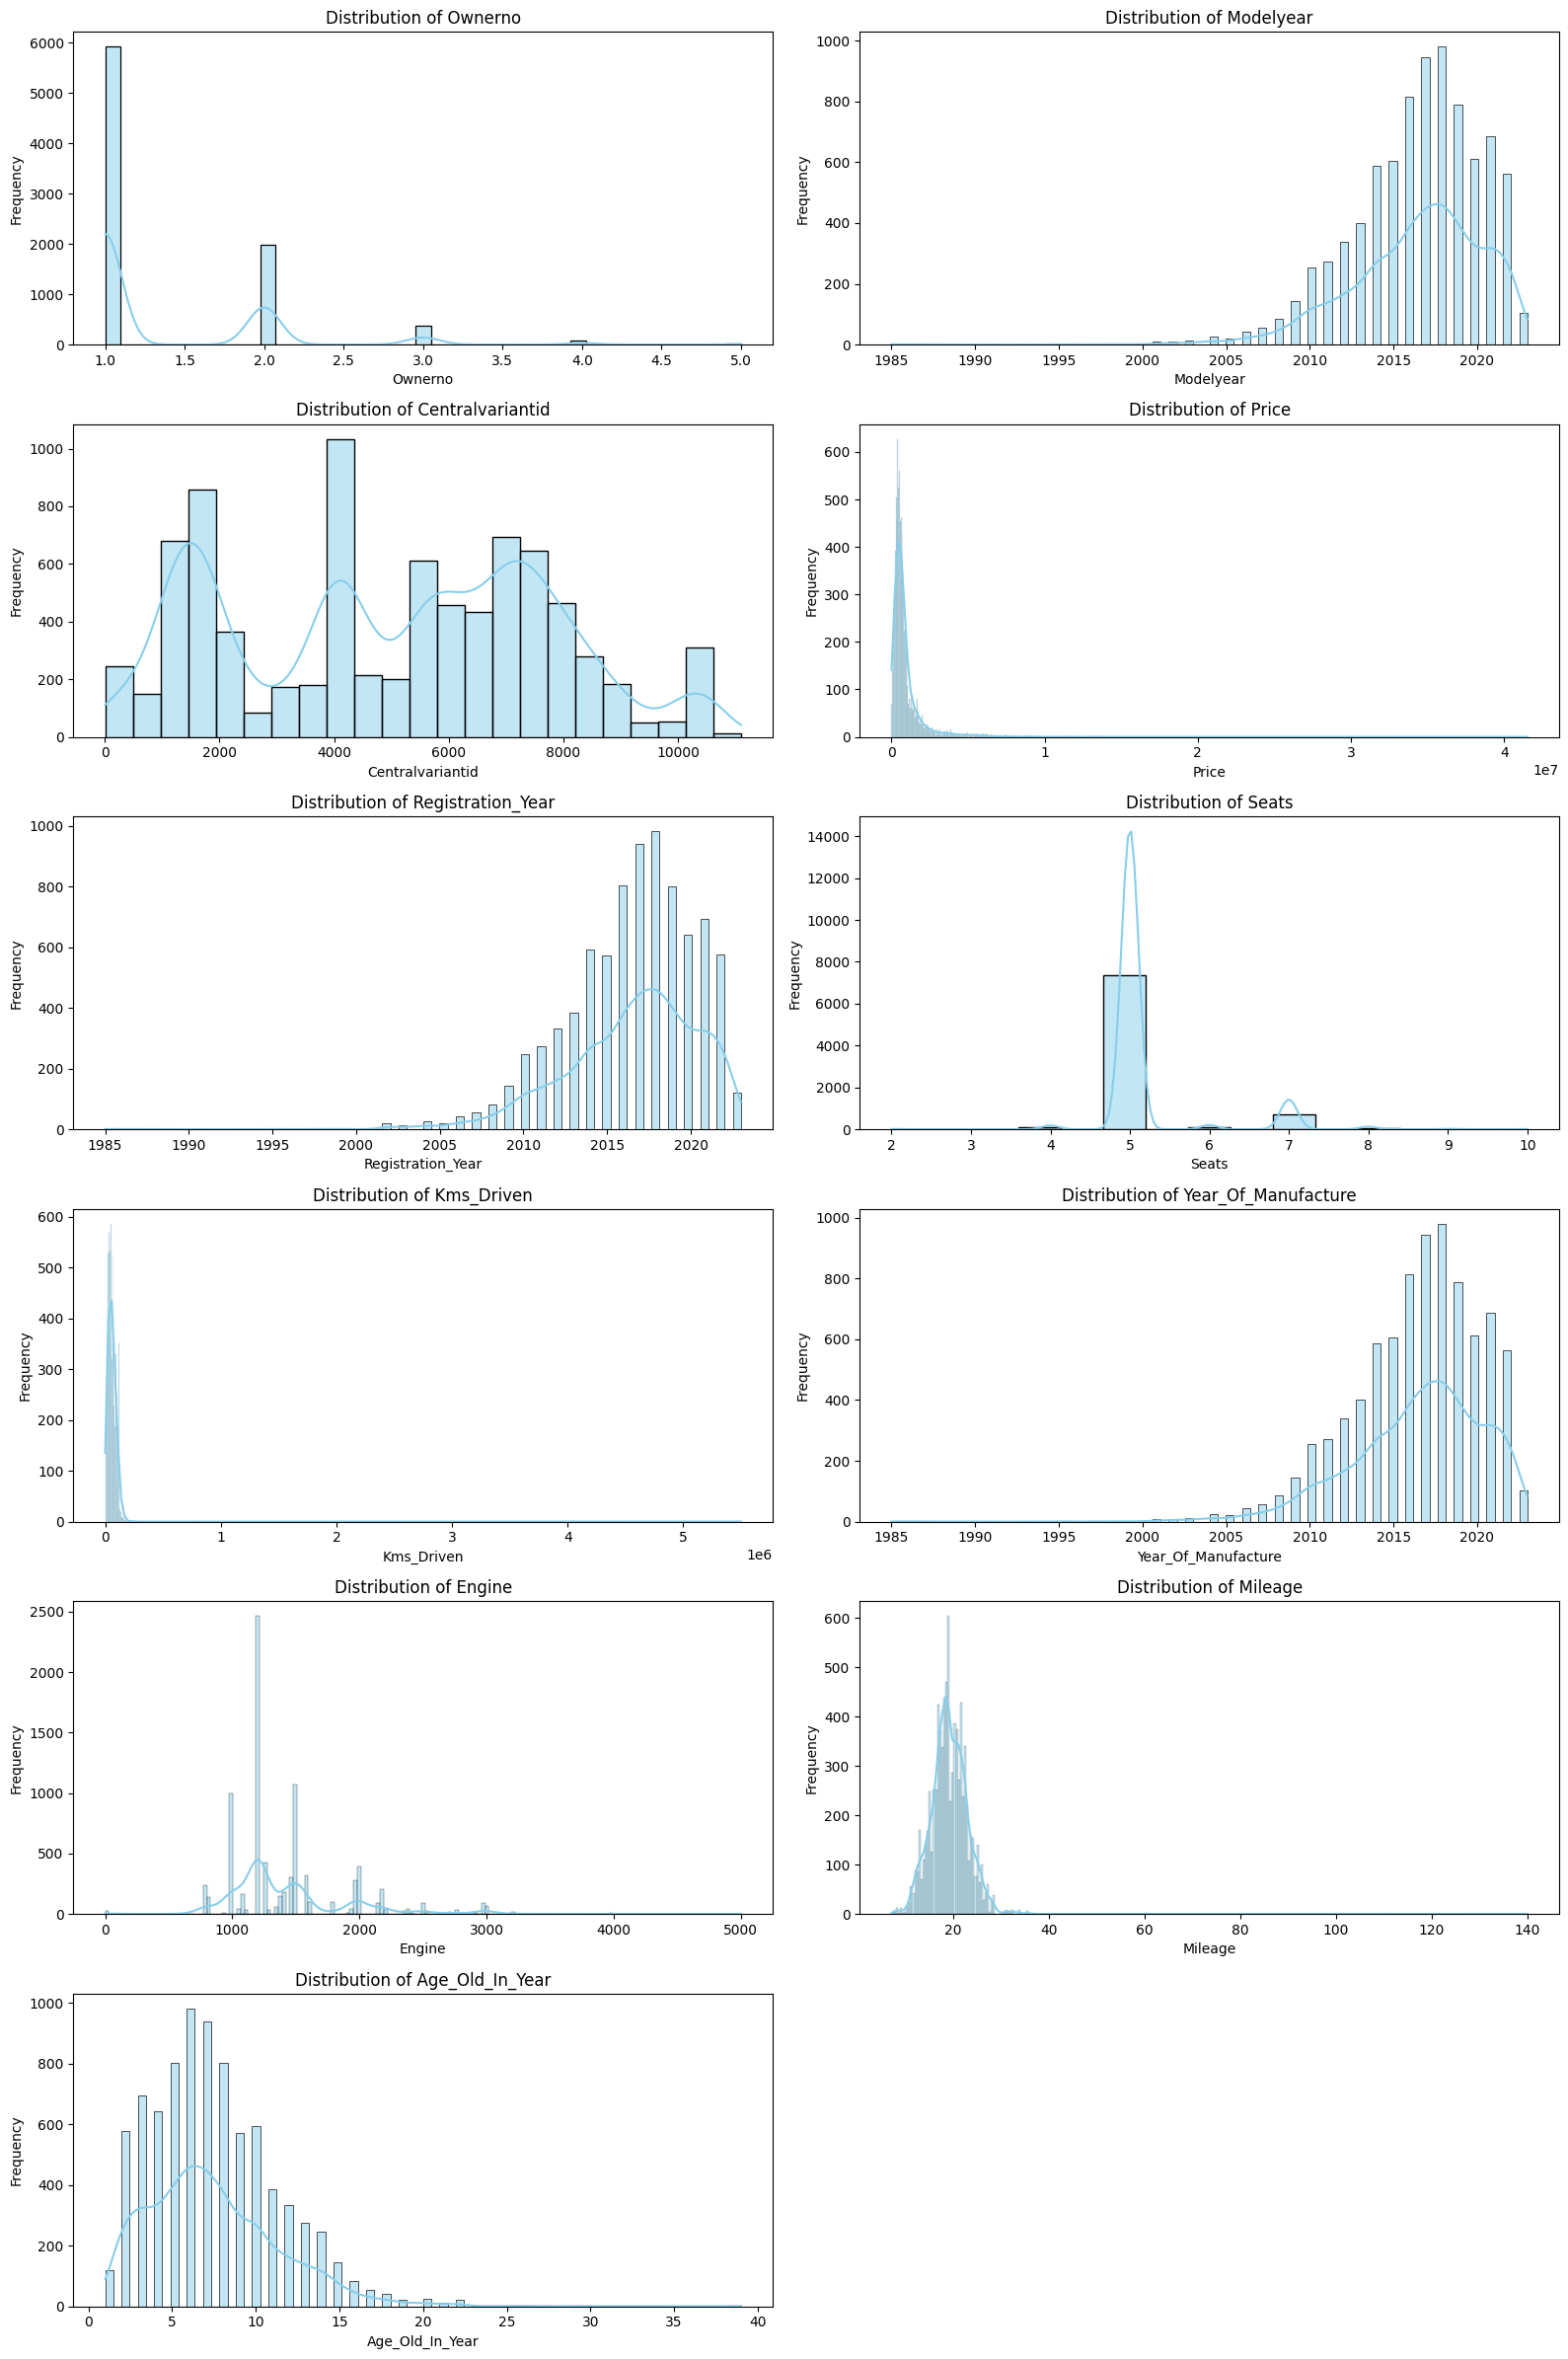

In [5]:
import math
import numpy as np

numeric_columns = df.select_dtypes(include=np.number).columns 


n_cols = 2  # Number of columns in the grid
n_rows = math.ceil(len(numeric_columns) / n_cols)

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()  

# Generate histograms for each numeric column
for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [6]:
df.head()

,City,Body_Type,Ownerno,Company,Model,Modelyear,Centralvariantid,Variantname,Price,Registration_Year,...,Dual_Tone_Dashboard,Height_Adjustable_Driver_Seat,Fog_Lights_Rear,Leather_Seats,Apple_Car_Play,Roof_Carrier,Speed_Alert,Outside_Rear_View_Mirror_Turn_Indicators,Wifi_Connectivity,Age_Old_In_Year
0,chennai,SUV,1,Kia,Sonet,2022,8654,Turbo DCT,1150000,2022,...,False,True,False,True,True,False,False,True,False,2
1,chennai,Minivans,1,Maruti,Eeco,2015,4025,7 Seater,415000,2015,...,False,False,False,False,False,False,False,False,False,9
2,chennai,SUV,1,Nissan,Magnite,2021,8135,Turbo XV,750000,2021,...,True,True,False,False,True,False,False,True,True,3
3,chennai,Hatchback,1,Hyundai,i10,2015,1579,Sportz,398000,2015,...,False,False,False,False,False,False,False,False,False,9
4,chennai,Hatchback,1,Honda,Jazz,2015,1341,1.2 VX,550000,2015,...,False,True,False,False,False,False,False,True,False,9


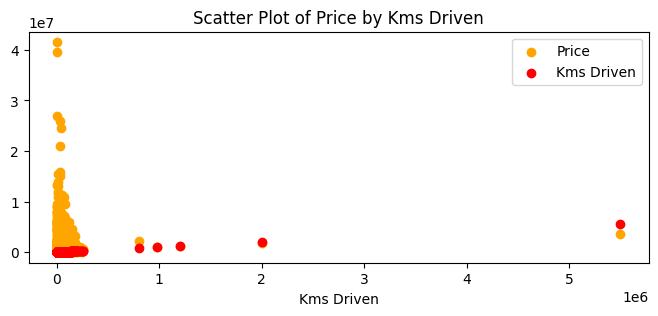

In [7]:
plt.figure(figsize=(8, 3))
plt.scatter(df['Kms_Driven'], df['Price'], color='orange', label='Price')
plt.scatter(df['Kms_Driven'], df['Kms_Driven'], color='red', label='Kms Driven')
plt.xlabel('Kms Driven')
plt.title('Scatter Plot of Price by Kms Driven')
plt.legend()
plt.show()

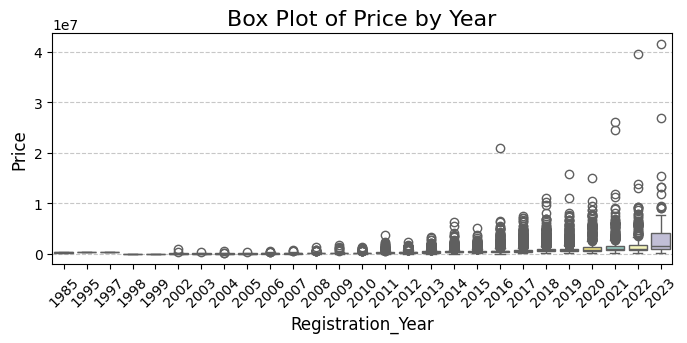

In [8]:
plt.figure(figsize=(8, 3))
sns.boxplot(x='Registration_Year', y='Price', data=df, hue='Registration_Year', palette='Set3', legend=False)

# Customizations
plt.title('Box Plot of Price by Year', fontsize=16)
plt.xlabel('Registration_Year', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

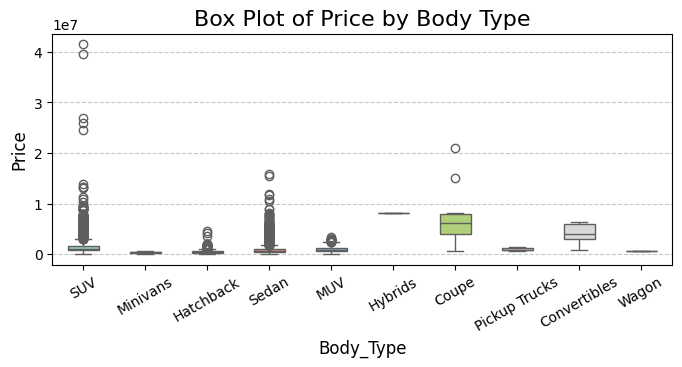

In [9]:
plt.figure(figsize=(8, 3))
sns.boxplot(x='Body_Type', y='Price', data=df, hue='Body_Type', palette='Set3', width=0.5)
plt.title('Box Plot of Price by Body Type', fontsize=16)
plt.xlabel('Body_Type', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

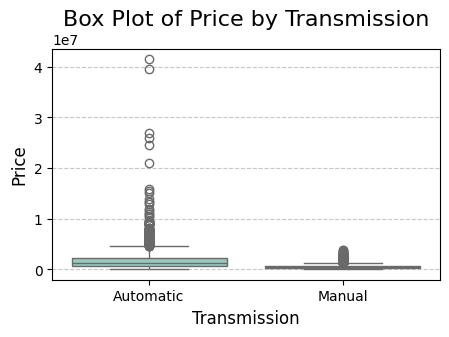

In [10]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='Transmission', y='Price', data=df, hue='Transmission', palette='Set3')
plt.title('Box Plot of Price by Transmission', fontsize=16)
plt.xlabel('Transmission', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

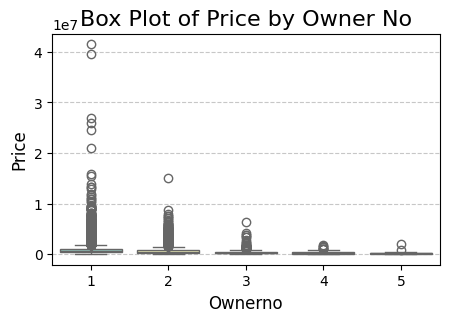

In [11]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='Ownerno', y='Price', data=df, hue='Ownerno', palette='Set3', legend=False)
plt.title('Box Plot of Price by Owner No', fontsize=16)
plt.xlabel('Ownerno', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [12]:
# Applying log Transformation for price 
df['Price'] = np.log(df['Price'])

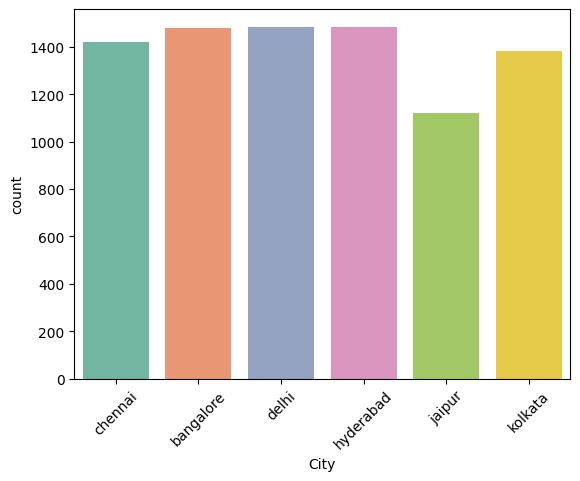

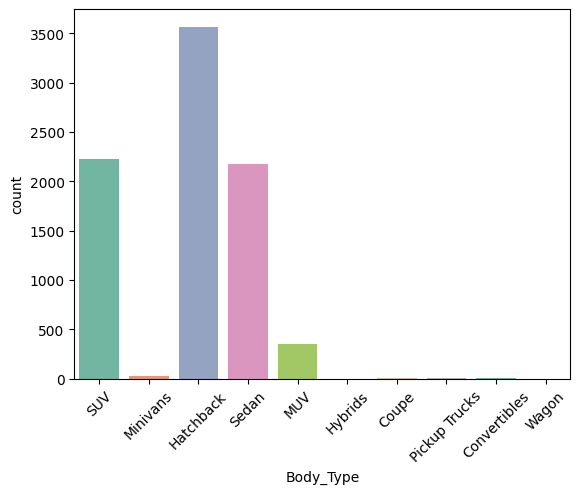

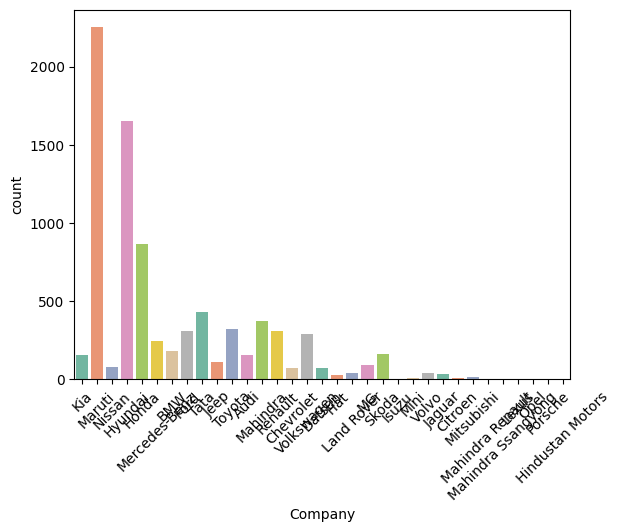

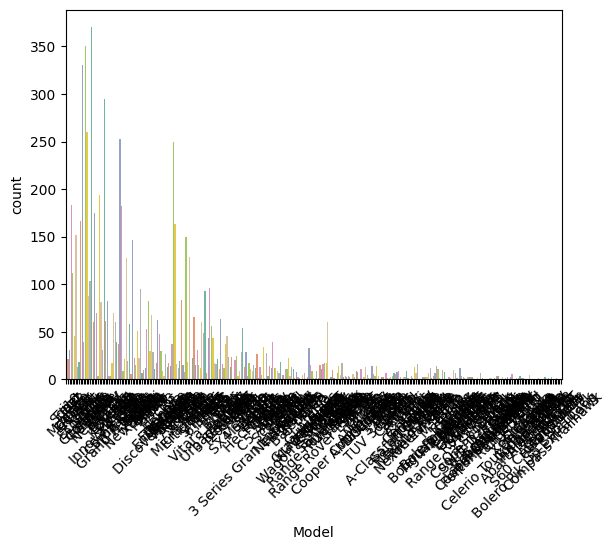

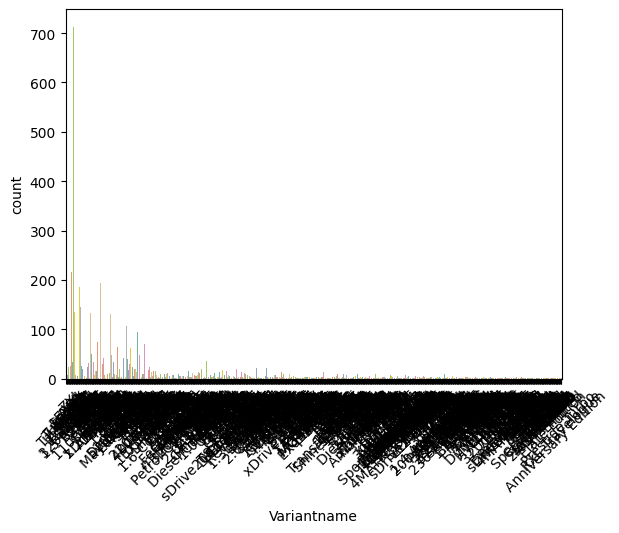

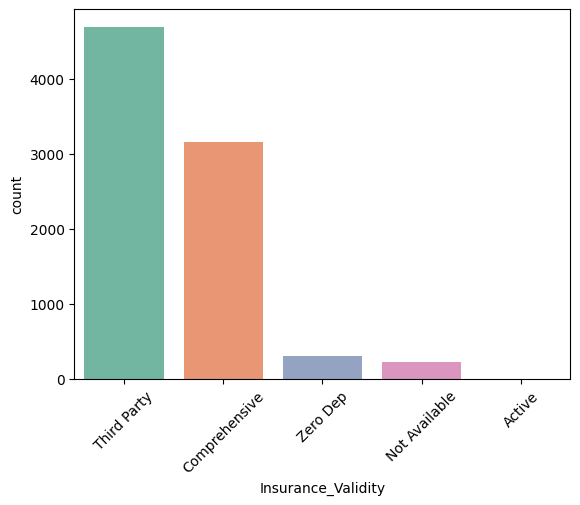

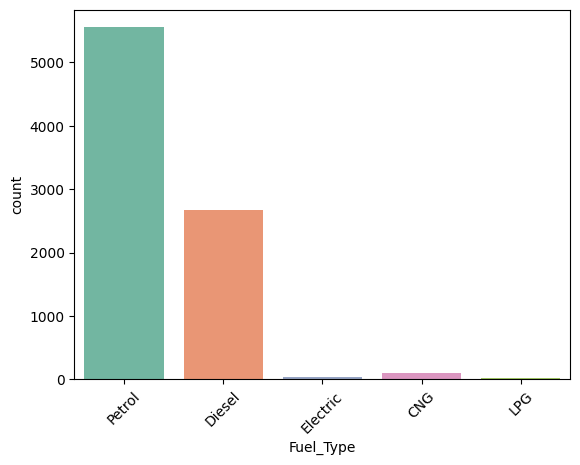

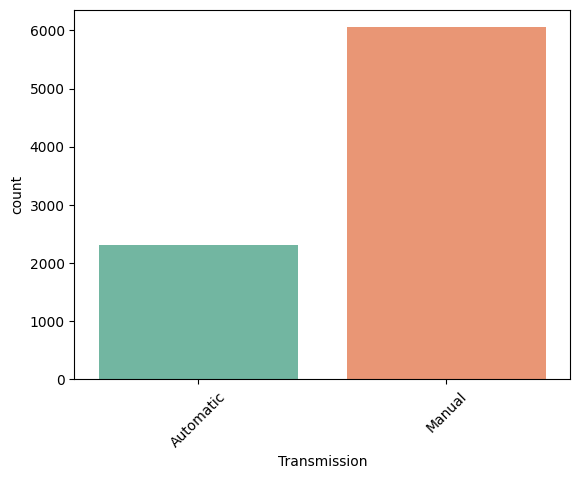

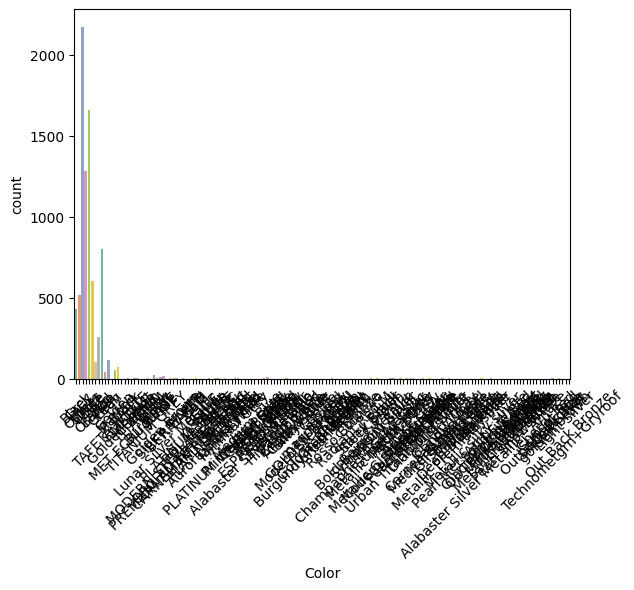

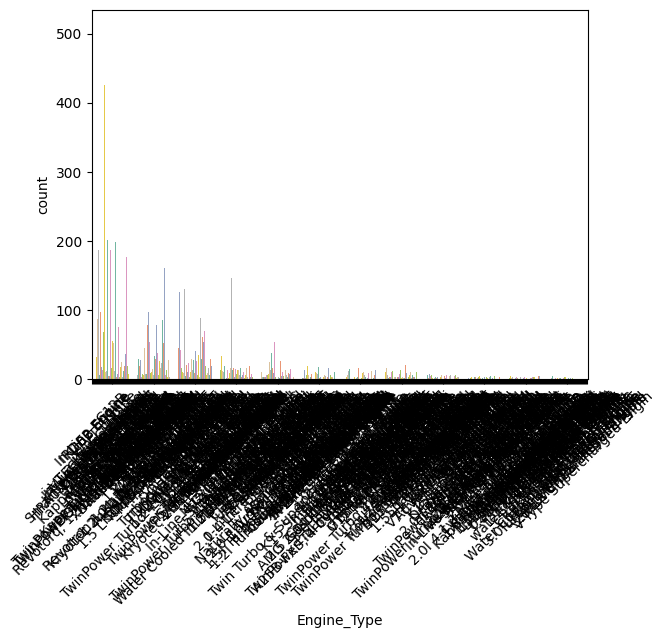

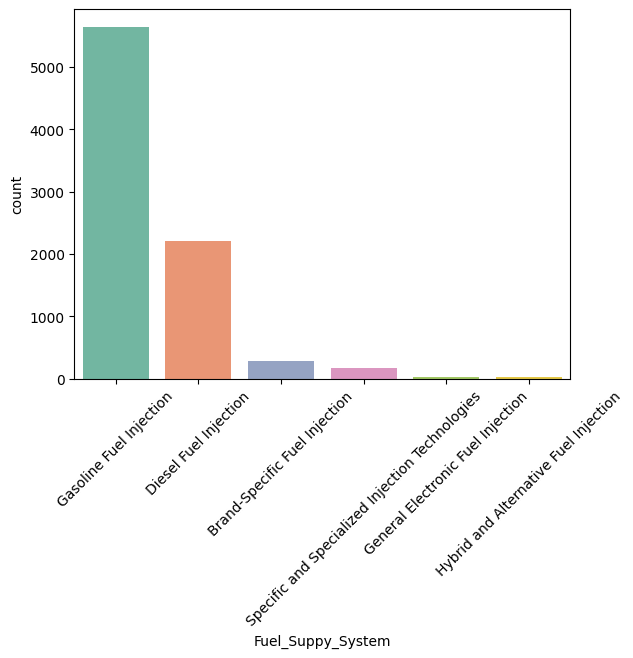

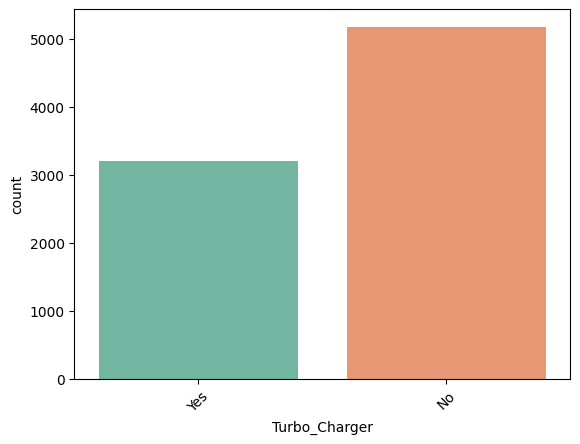

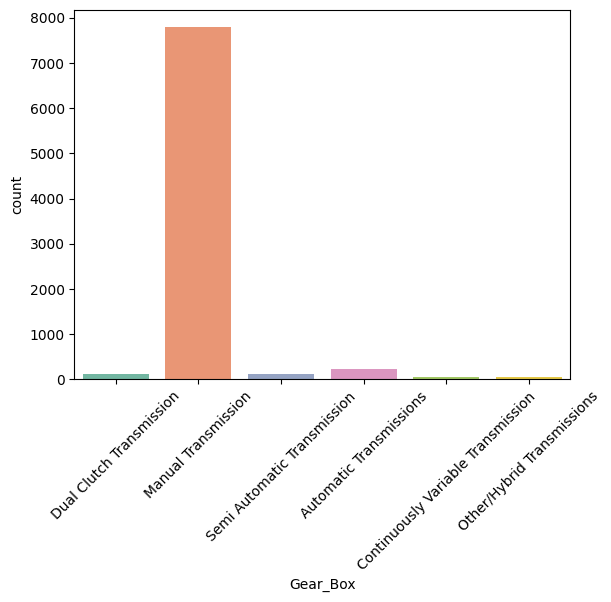

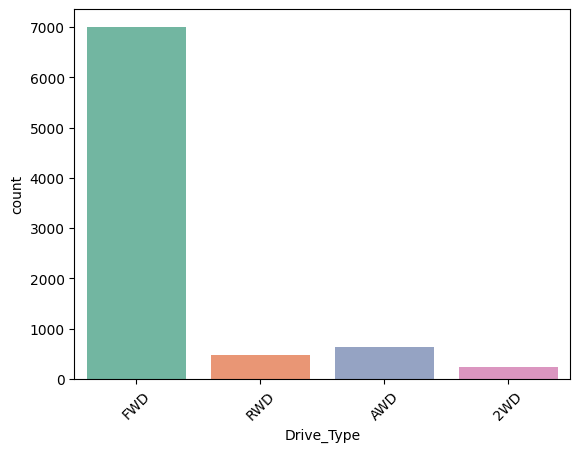

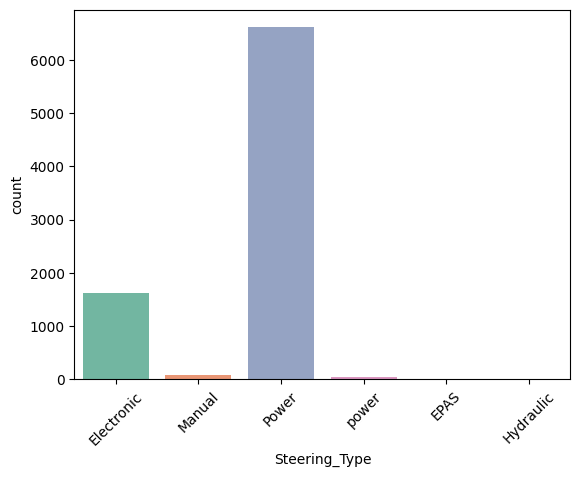

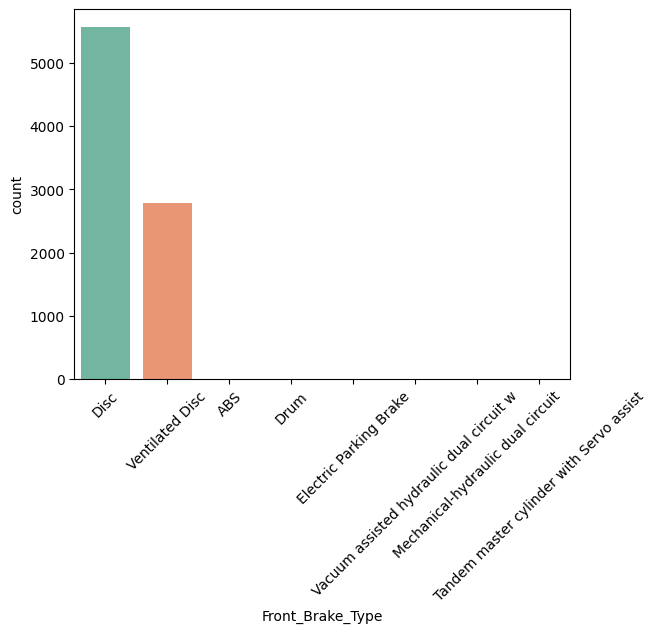

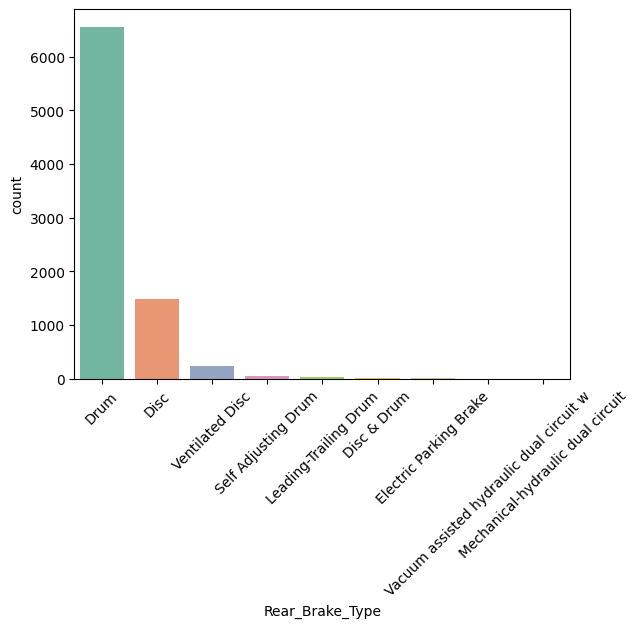

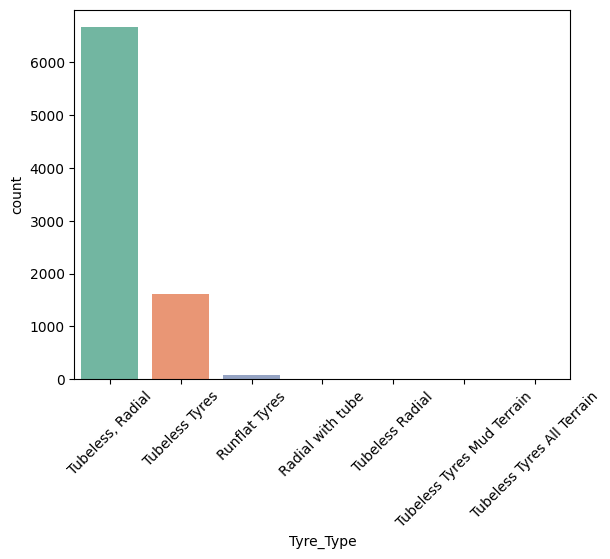

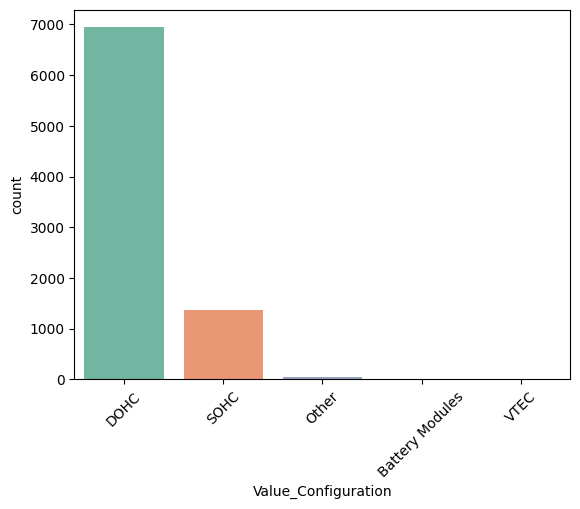

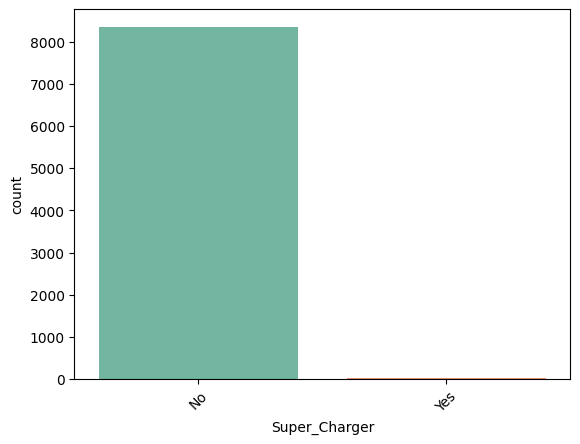

In [13]:
for column in df.columns:
    if df[column].dtype == 'object':
        sns.countplot(data=df, x=column, hue=column, palette='Set2')
        plt.xticks(rotation=45)  
        plt.show()

In [14]:
# Removing high ordinal less relevant features
features_to_remove = ['Color', 'Tyre_Type', 'Front_Brake_Type', 'Rear_Brake_Type', 'Engine_Type']
df = df.drop(columns=features_to_remove)
        

In [15]:
df.to_csv('Datasets/final_cleaned_cars_data.csv', index=False)

In [16]:
df.head()

,City,Body_Type,Ownerno,Company,Model,Modelyear,Centralvariantid,Variantname,Price,Registration_Year,...,Dual_Tone_Dashboard,Height_Adjustable_Driver_Seat,Fog_Lights_Rear,Leather_Seats,Apple_Car_Play,Roof_Carrier,Speed_Alert,Outside_Rear_View_Mirror_Turn_Indicators,Wifi_Connectivity,Age_Old_In_Year
0,chennai,SUV,1,Kia,Sonet,2022,8654,Turbo DCT,13.955273,2022,...,False,True,False,True,True,False,False,True,False,2
1,chennai,Minivans,1,Maruti,Eeco,2015,4025,7 Seater,12.936034,2015,...,False,False,False,False,False,False,False,False,False,9
2,chennai,SUV,1,Nissan,Magnite,2021,8135,Turbo XV,13.527828,2021,...,True,True,False,False,True,False,False,True,True,3
3,chennai,Hatchback,1,Hyundai,i10,2015,1579,Sportz,12.894207,2015,...,False,False,False,False,False,False,False,False,False,9
4,chennai,Hatchback,1,Honda,Jazz,2015,1341,1.2 VX,13.217674,2015,...,False,True,False,False,False,False,False,True,False,9
